# Decision Tree-2

You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link:
https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#import dataset:
url=' https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


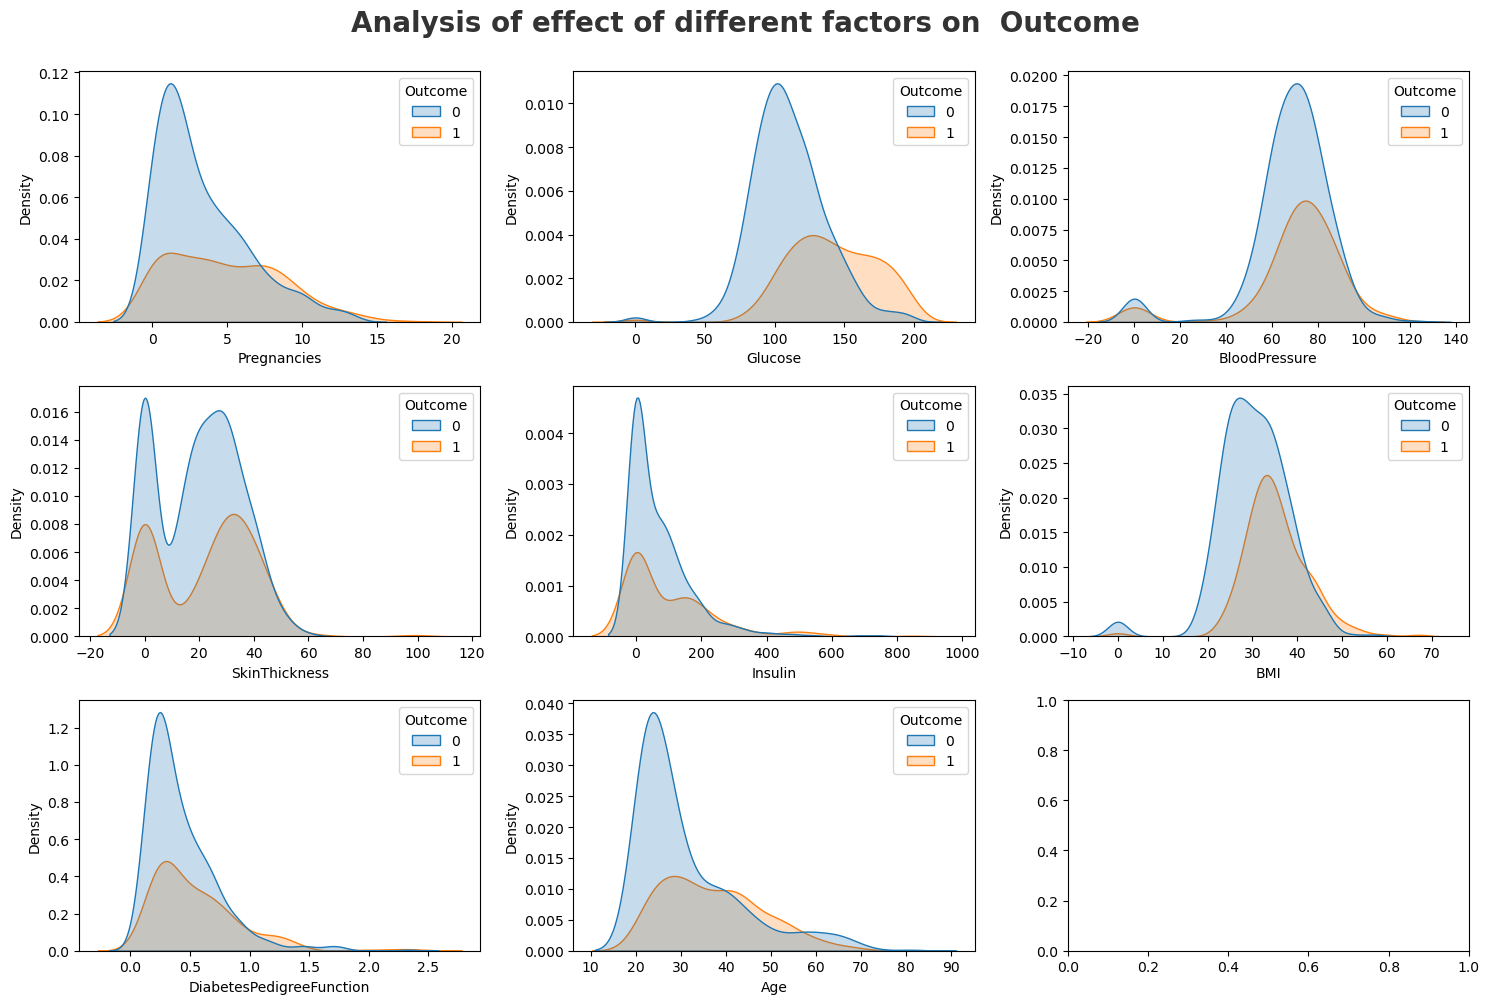

In [3]:
factor = list([col for col in df.iloc[:,:-1].columns])

plt.subplots(3,3,figsize=(15,10))
plt.suptitle('Analysis of effect of different factors on  Outcome', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0,len(factor)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(data=df, x=factor[i], fill=True, hue='Outcome')
    plt.tight_layout()

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no missing values in our data

In [32]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Glucose, BloodPressure, SkinThickness, Insulin, BMI can't be zero

In [33]:
df.shape

(768, 9)

In [40]:
print(f"Number of 0 records in Insulin: {(df['Insulin']==0).sum()}") 
print(f"Number of 0 records in Glucose: {(df['Glucose']==0).sum()}") 
print(f"Number of 0 records in SkinThickness: {(df['SkinThickness']==0).sum()}")
print(f"Number of 0 records in BloodPressure: {(df['BloodPressure']==0).sum()}")
print(f"Number of 0 records in BMI: {(df['BMI']==0).sum()}")

Number of 0 records in Insulin: 374
Number of 0 records in Glucose: 5
Number of 0 records in SkinThickness: 227
Number of 0 records in BloodPressure: 35
Number of 0 records in BMI: 11


Out of 768 entries 374 entries of Insulin and 227 entries of SkinThickness are zero, it is better to drop the Insulin and SkinThickness columns as number of unavailable entries are very large. For the remaining columns, we can replace the null entries by the mean of that column

In [3]:
df.drop(['Insulin', 'SkinThickness'], inplace=True, axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


In [4]:
df['Glucose'].replace(0, df['Glucose'].mean(), inplace=True)
df['BloodPressure'].replace(0, df['BloodPressure'].mean(), inplace=True)
df['BMI'].replace(0, df['BMI'].mean(), inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1


In [45]:
print(f"Number of 0 records in Glucose: {(df['Glucose']==0).sum()}") 
print(f"Number of 0 records in BloodPressure: {(df['BloodPressure']==0).sum()}")
print(f"Number of 0 records in BMI: {(df['BMI']==0).sum()}")

Number of 0 records in Glucose: 0
Number of 0 records in BloodPressure: 0
Number of 0 records in BMI: 0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 42.1 KB


There are no categorical variables in our dataset.

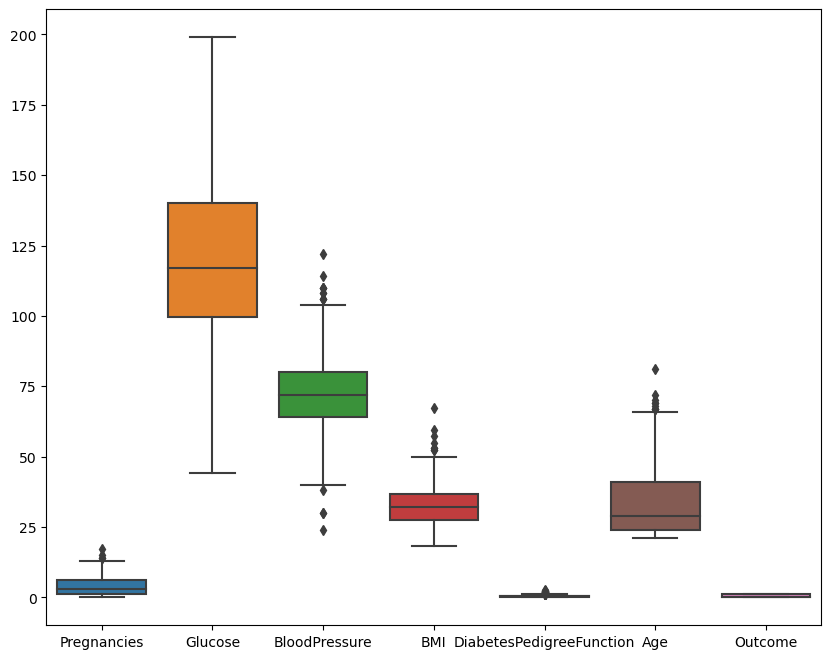

In [46]:
plt.figure(figsize=(10,8))
sns.boxplot(df)
plt.show()

There are no large number of major outliers in our data.

##### Summary:

- Dropped SkinThickness, Insulin columns
- Replaced 0 values in Glucose, BloodPressure, BMI by their mean
- No missing Values
- No categorical variables
- No major outliers

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [5]:
from sklearn.model_selection import train_test_split

X=df.iloc[:,:-1]
y=df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=25)

In [6]:
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (576, 6)
Shape of X_test : (192, 6)
Shape of y_train : (576,)
Shape of y_test : (192,)


Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters ={
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth':list(range(1,50)),
    'max_features':['auto', 'sqrt', 'log2']
}

tree_model = DecisionTreeClassifier()

clf=GridSearchCV(tree_model, param_grid=parameters, cv=5, scoring='accuracy')

In [12]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [15]:
clf.best_params_

{'criterion': 'log_loss',
 'max_depth': 6,
 'max_features': 'log2',
 'splitter': 'random'}

In [16]:
clf.best_score_

0.7378710644677661

So, new tree model with best parameters:

In [27]:
tree_model = DecisionTreeClassifier(criterion= 'log_loss', max_depth=6, max_features='log2', splitter='random')

tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=6, max_features='log2',
                       splitter='random')

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred= clf.predict(X_test)

print(f'confusion Matrix: \n{confusion_matrix(y_pred=y_pred,y_true=y_test)}\n')
print(f'Accuracy score : {accuracy_score(y_pred,y_test)}\n')
print(classification_report(y_pred,y_test))

confusion Matrix: 
[[116  14]
 [ 33  29]]

Accuracy score : 0.7552083333333334

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       149
           1       0.47      0.67      0.55        43

    accuracy                           0.76       192
   macro avg       0.68      0.73      0.69       192
weighted avg       0.80      0.76      0.77       192



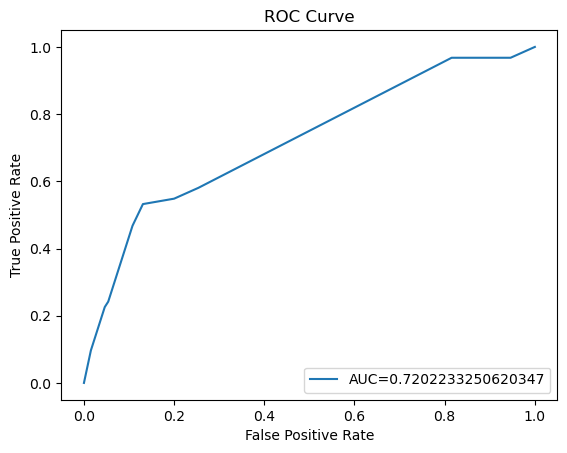

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.title('ROC Curve')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

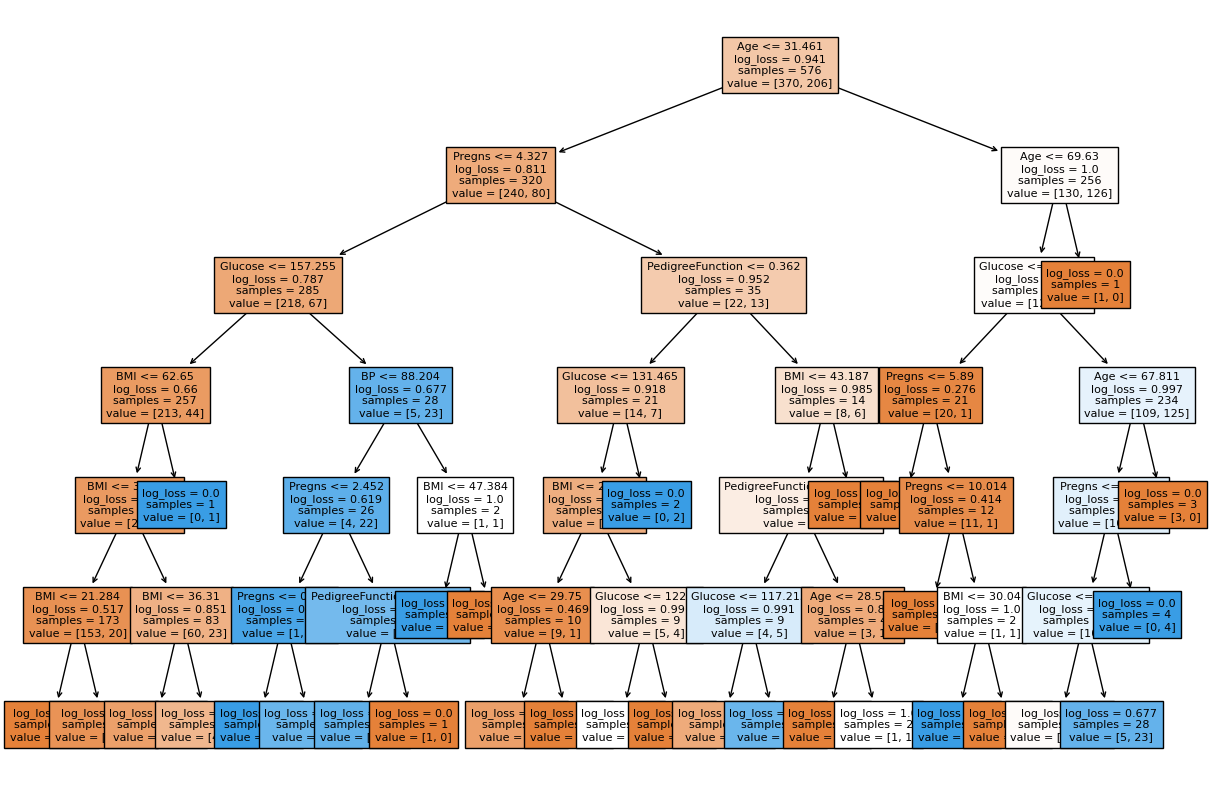

In [35]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(tree_model, filled=True, fontsize=8, feature_names=['Pregns', 'Glucose', 'BP', 'BMI','PedigreeFunction', 'Age'])
plt.show()

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.